In [1]:
!pip install pandas numpy scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
!git clone https://github.com/Ardavaa/GDG-feature-eng-data-prep.git

Cloning into 'GDG-feature-eng-data-prep'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 7.72 MiB | 11.11 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

In [111]:
df_chn = pd.read_csv('FDC.csv')
df_chn.head(10)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,2,1315,190
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180
7,3.3,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137
8,3.3,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,...,2.0,2.0,5,725.0,345,none,3,2,760,180
9,3.3,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1.0,...,1.0,1.0,4,580.0,345,field hockey,5,1,900,125


In [112]:
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [113]:
cols_to_remove = ['meals_dinner_friend','healthy_meal','ideal_diet','diet_current','eating_changes','food_childhood','comfort_food_reasons','comfort_food_reasons_coded.1','eating_changes_coded1','drink','exercise','cuisine','type_sports']

In [114]:
df_chn.drop(cols_to_remove, axis=1, inplace=True)

df_chn.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons_coded,cook,...,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,9.0,2.0,...,3.0,1.0,1.0,1,1165.0,345,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream",1.0,3.0,...,3.0,1.0,1.0,2,725.0,690,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food",1.0,1.0,...,6.0,1.0,2.0,5,1165.0,500,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",2.0,2.0,...,5.0,1.0,2.0,5,725.0,690,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips",1.0,1.0,...,4.0,1.0,1.0,4,940.0,500,4,2,760,190


In [116]:
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         123 non-null    object 
 1   Gender                      125 non-null    int64  
 2   breakfast                   125 non-null    int64  
 3   calories_chicken            125 non-null    int64  
 4   calories_day                106 non-null    float64
 5   calories_scone              124 non-null    float64
 6   coffee                      125 non-null    int64  
 7   comfort_food                124 non-null    object 
 8   comfort_food_reasons_coded  106 non-null    float64
 9   cook                        122 non-null    float64
 10  diet_current_coded          125 non-null    int64  
 11  eating_changes_coded        125 non-null    int64  
 12  eating_out                  125 non-null    int64  
 13  employment                  116 non

In [117]:
fix_cols = ['GPA', 'weight']
df_chn[fix_cols] = df_chn[fix_cols].apply(pd.to_numeric, errors='coerce')


In [118]:
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         120 non-null    float64
 1   Gender                      125 non-null    int64  
 2   breakfast                   125 non-null    int64  
 3   calories_chicken            125 non-null    int64  
 4   calories_day                106 non-null    float64
 5   calories_scone              124 non-null    float64
 6   coffee                      125 non-null    int64  
 7   comfort_food                124 non-null    object 
 8   comfort_food_reasons_coded  106 non-null    float64
 9   cook                        122 non-null    float64
 10  diet_current_coded          125 non-null    int64  
 11  eating_changes_coded        125 non-null    int64  
 12  eating_out                  125 non-null    int64  
 13  employment                  116 non

In [119]:
df_chn.isna().sum()

,0
GPA,5
Gender,0
breakfast,0
calories_chicken,0
calories_day,19
calories_scone,1
coffee,0
comfort_food,1
comfort_food_reasons_coded,19
cook,3


In [120]:
df_chn.duplicated().sum()

0

In [121]:
num_cols = ['GPA', 'calories_day', 'calories_scone', 'comfort_food_reasons_coded', 'cook', 'employment', 'father_education', 'fav_food', 'income', 'life_rewarding','marital_status', 'mother_education', 'on_off_campus', 'persian_food', 'self_perception_weight', 'soup', 'sports', 'tortilla_calories']


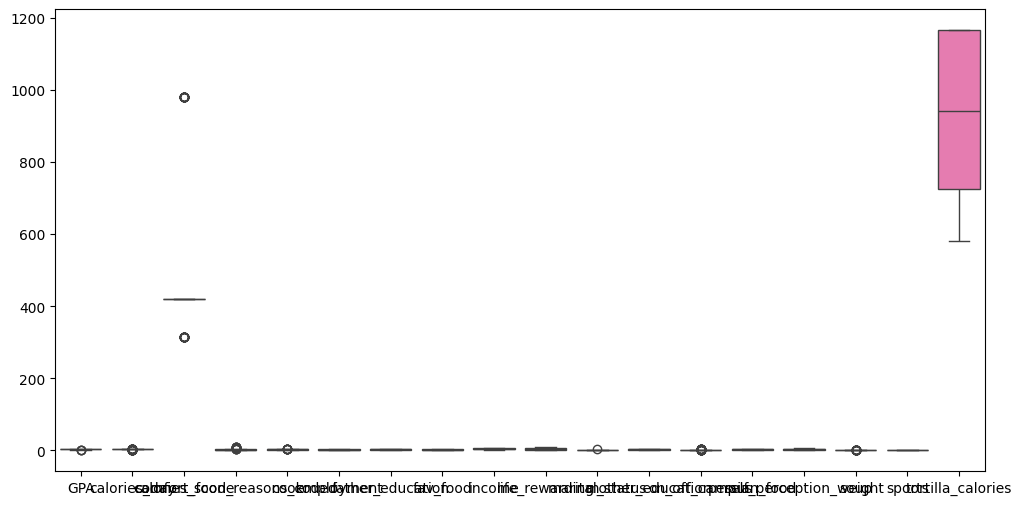

In [122]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_chn[num_cols])
plt.show()

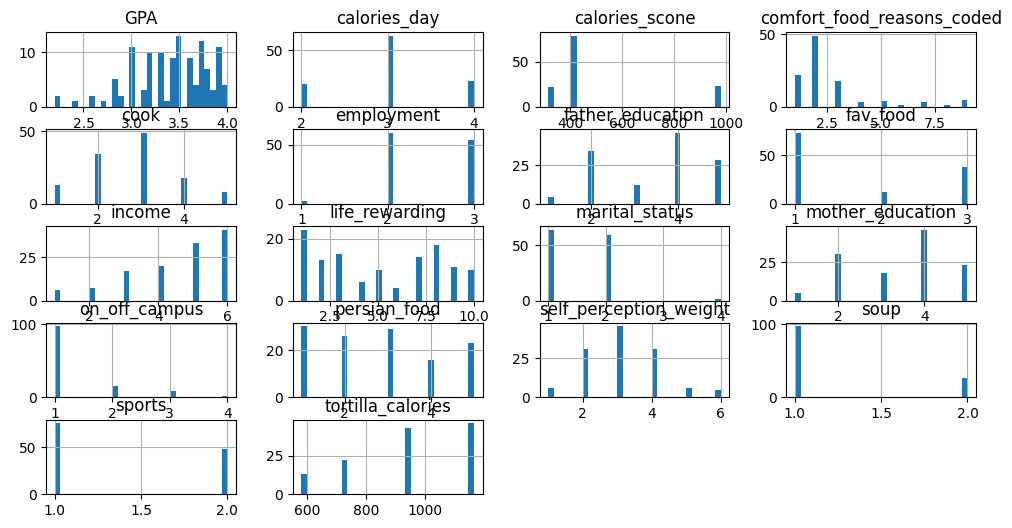

In [123]:
df_chn[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()

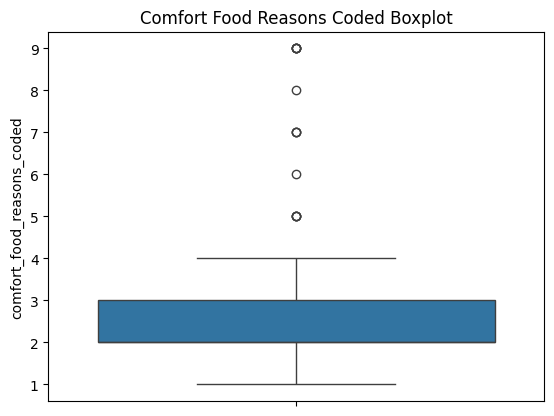

In [124]:
sns.boxplot(data=df_chn['comfort_food_reasons_coded'])
plt.title('Comfort Food Reasons Coded Boxplot')
plt.show()

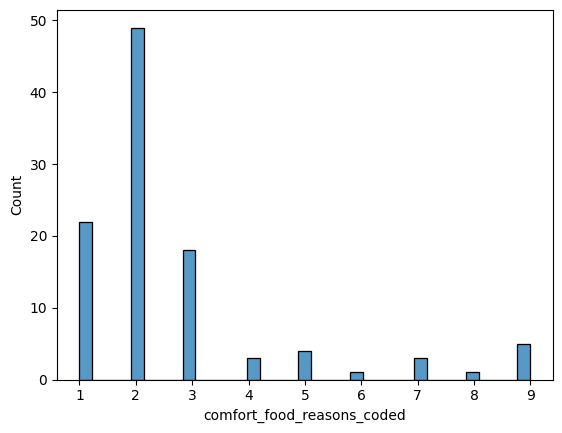

In [125]:
sns.histplot(df_chn['comfort_food_reasons_coded'], bins=35)
plt.show()

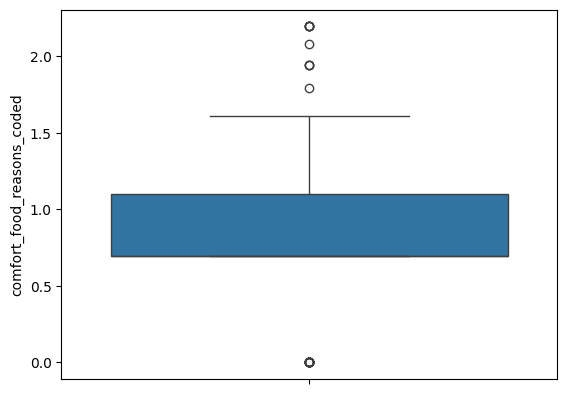

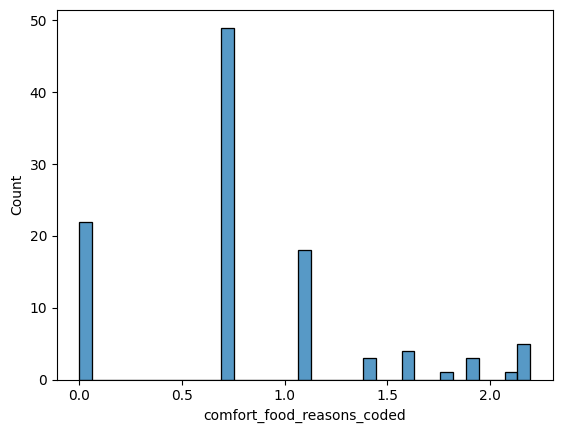

In [126]:
df_chn['comfort_food_reasons_coded'] = np.log(df_chn['comfort_food_reasons_coded'])

sns.boxplot(df_chn['comfort_food_reasons_coded'])
plt.show()

sns.histplot(df_chn['comfort_food_reasons_coded'], bins=35)
plt.show()

Prediksi Weight (Berat Badan)

In [127]:
X = df_chn.drop('weight', axis=1)
y = df_chn['weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((100, 47), (25, 47), (100,), (25,))

In [128]:
df_chn.isna().sum()

,0
GPA,5
Gender,0
breakfast,0
calories_chicken,0
calories_day,19
calories_scone,1
coffee,0
comfort_food,1
comfort_food_reasons_coded,19
cook,3


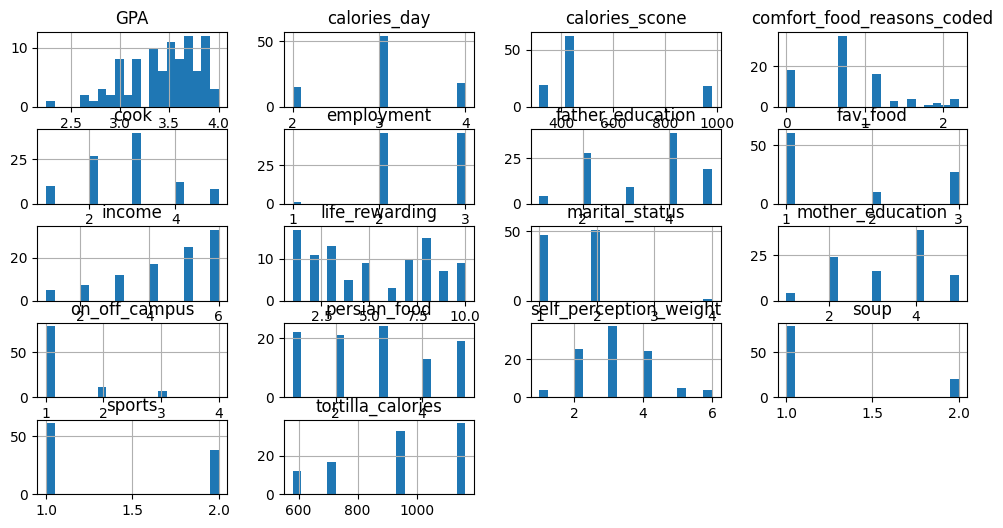

In [129]:
X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

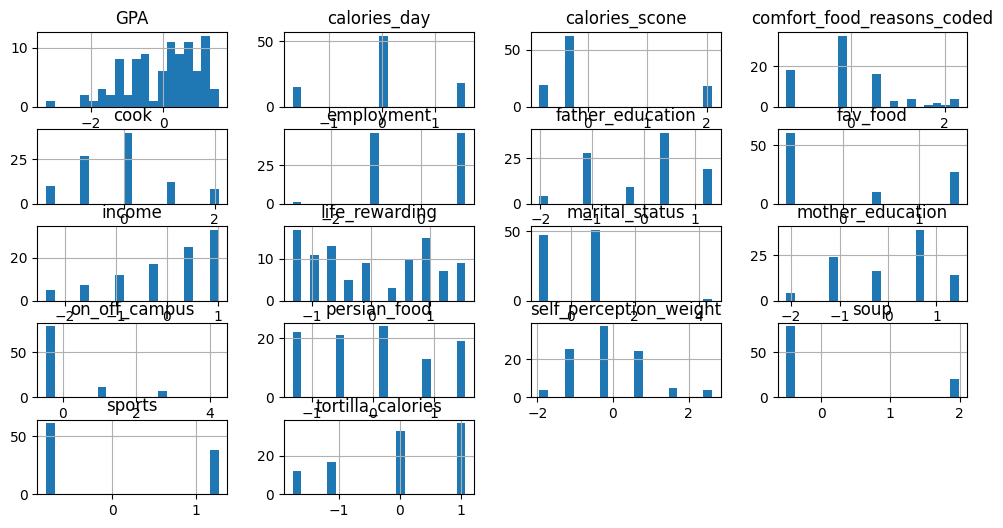

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

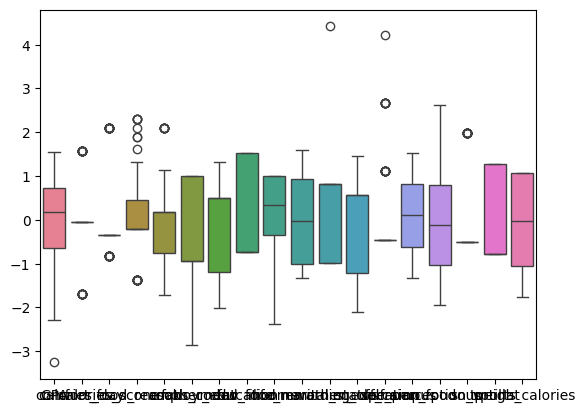

In [131]:
sns.boxplot(data=X_train[num_cols])
plt.show()

In [132]:
X_train.isna().sum() / len(X_train)

,0
GPA,0.05
Gender,0.00
breakfast,0.00
calories_chicken,0.00
calories_day,0.13
calories_scone,0.01
coffee,0.00
comfort_food,0.01
comfort_food_reasons_coded,0.16
cook,0.03


In [133]:
X_test.isna().sum() / len(X_test)

,0
GPA,0.00
Gender,0.00
breakfast,0.00
calories_chicken,0.00
calories_day,0.24
calories_scone,0.00
coffee,0.00
comfort_food,0.00
comfort_food_reasons_coded,0.12
cook,0.00


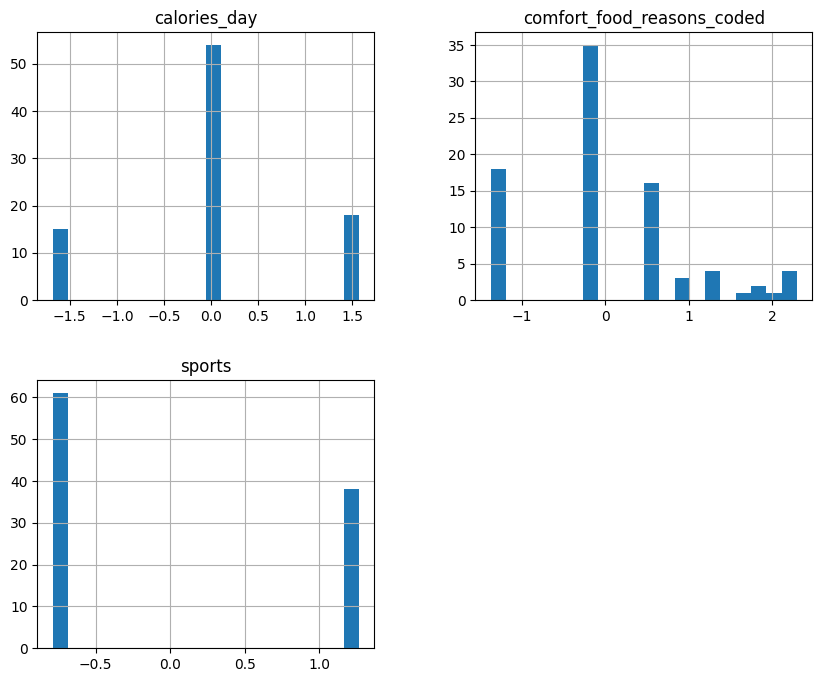

In [135]:
X_train[['calories_day','comfort_food_reasons_coded','sports']].hist(bins=20, figsize=(10, 8))
plt.show()

In [136]:
X_train['calories_day'].skew(), X_train['comfort_food_reasons_coded'].skew(), X_train['sports'].skew()

(-0.020457572435035563, 0.5089151008739968, 0.4850985998139724)

In [137]:
X_train['calories_day'].fillna(X_train['calories_day'].median(), inplace=True)
X_test['calories_day'].fillna(X_test['calories_day'].median(), inplace=True)

X_train['comfort_food_reasons_coded'].fillna(X_train['comfort_food_reasons_coded'].mean(), inplace=True)
X_test['comfort_food_reasons_coded'].fillna(X_test['comfort_food_reasons_coded'].mean(), inplace=True)

X_train['sports'].fillna(X_train['sports'].mean(), inplace=True)
X_test['sports'].fillna(X_test['sports'].mean(), inplace=True)

X_train['GPA'].fillna(X_train['GPA'].median(), inplace=True)
X_test['GPA'].fillna(X_test['GPA'].median(), inplace=True)

X_train['calories_scone'].fillna(X_train['calories_scone'].median(), inplace=True)
X_test['calories_scone'].fillna(X_test['calories_scone'].median(), inplace=True)

X_train['cook'].fillna(X_train['cook'].median(), inplace=True)
X_test['cook'].fillna(X_test['cook'].median(), inplace=True)

X_train['employment'].fillna(X_train['employment'].median(), inplace=True)
X_test['employment'].fillna(X_test['employment'].median(), inplace=True)

X_train['father_education'].fillna(X_train['father_education'].median(), inplace=True)
X_test['father_education'].fillna(X_test['father_education'].median(), inplace=True)

X_train['fav_food'].fillna(X_train['fav_food'].median(), inplace=True)
X_test['fav_food'].fillna(X_test['fav_food'].median(), inplace=True)

X_train['income'].fillna(X_train['income'].median(), inplace=True)
X_test['income'].fillna(X_test['income'].median(), inplace=True)

X_train['life_rewarding'].fillna(X_train['life_rewarding'].median(), inplace=True)
X_test['life_rewarding'].fillna(X_test['life_rewarding'].median(), inplace=True)

X_train['marital_status'].fillna(X_train['marital_status'].median(), inplace=True)
X_test['marital_status'].fillna(X_test['marital_status'].median(), inplace=True)

X_train['mother_education'].fillna(X_train['mother_education'].median(), inplace=True)
X_test['mother_education'].fillna(X_test['mother_education'].median(), inplace=True)

X_train['on_off_campus'].fillna(X_train['on_off_campus'].median(), inplace=True)
X_test['on_off_campus'].fillna(X_test['on_off_campus'].median(), inplace=True)

X_train['persian_food'].fillna(X_train['persian_food'].median(), inplace=True)
X_test['persian_food'].fillna(X_test['persian_food'].median(), inplace=True)

X_train['self_perception_weight'].fillna(X_train['self_perception_weight'].median(), inplace=True)
X_test['self_perception_weight'].fillna(X_test['self_perception_weight'].median(), inplace=True)

X_train['soup'].fillna(X_train['soup'].median(), inplace=True)
X_test['soup'].fillna(X_test['soup'].median(), inplace=True)

X_train['tortilla_calories'].fillna(X_train['tortilla_calories'].median(), inplace=True)
X_test['tortilla_calories'].fillna(X_test['tortilla_calories'].median(), inplace=True)



X_train.isna().sum() / len(X_train)

,0
GPA,0.00
Gender,0.00
breakfast,0.00
calories_chicken,0.00
calories_day,0.00
calories_scone,0.00
coffee,0.00
comfort_food,0.01
comfort_food_reasons_coded,0.00
cook,0.00


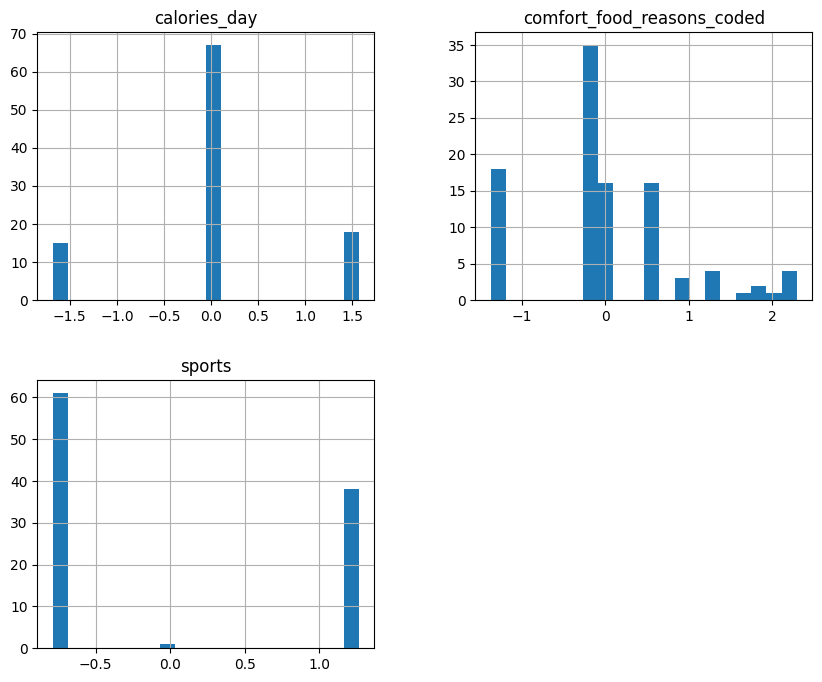

In [138]:
X_train[['calories_day','comfort_food_reasons_coded','sports']].hist(bins=20, figsize=(10, 8))
plt.show()

In [139]:
print(X_test.isna().sum())

GPA                           0
Gender                        0
breakfast                     0
calories_chicken              0
calories_day                  0
calories_scone                0
coffee                        0
comfort_food                  0
comfort_food_reasons_coded    0
cook                          0
diet_current_coded            0
eating_changes_coded          0
eating_out                    0
employment                    0
ethnic_food                   0
father_education              0
father_profession             0
fav_cuisine                   0
fav_cuisine_coded             0
fav_food                      0
fries                         0
fruit_day                     0
grade_level                   0
greek_food                    0
healthy_feeling               0
ideal_diet_coded              0
income                        0
indian_food                   0
italian_food                  0
life_rewarding                0
marital_status                0
mother_e

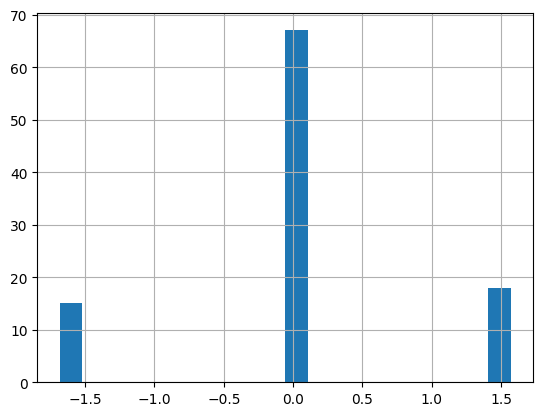

In [140]:
X_train['calories_day'].hist(bins=20)
plt.show()

In [142]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

print('-'*50)
for col in categorical_cols:
    print(X_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
comfort_food
Ice cream, cake, mozzarella sticks, pierogies                 1
carrots and ranch, pretzels, dark chocolate                   1
Noodle ( any kinds of noodle), Tuna sandwich, and Egg.\r      1
Grandma's Chinese, Peruvian food from back home, and sushi    1
mac and cheese, potato soup, ice cream, chips and cheese      1
                                                             ..
mac n cheese, peanut butter and banana sandwich, omelet       1
fried chicken. mashed potatoes, mac and cheese                1
Candy\rPop\rChocolate \rChipotle \rMoe's                      1
Broccoli, spaghetti squash, quinoa, and grilled chicken       1
Pizza, mashed potatoes, spaghetti                             1
Name: count, Length: 99, dtype: int64
--------------------------------------------------
father_profession
Lawyer                               2
Construction                         2
business owner                       2
Business

In [143]:
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

X_train.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,diet_current_coded,...,mother_profession_owns business,mother_profession_principal,mother_profession_school teacher,mother_profession_secretary,mother_profession_stay at home mom,mother_profession_stylist,mother_profession_teacher,mother_profession_telemarketer,mother_profession_unemployed,mother_profession_works in Loans department in First National Bank
67,0.445596,1,1,610,-1.682316,-0.356543,1,-2.143297e-01,1.137146,2,...,False,False,False,False,False,False,False,False,False,False
12,-0.102422,2,1,430,-0.056077,-0.356543,2,4.639620e-01,2.088035,1,...,False,False,False,False,False,False,False,False,False,False
24,1.267622,1,1,720,-1.682316,-0.356543,2,1.623509e+00,-1.715521,1,...,False,False,False,False,False,False,False,False,False,False
45,0.459296,1,1,610,-0.056077,-0.814955,2,9.452176e-01,0.186257,1,...,False,False,False,False,False,False,False,False,False,False
108,0.993614,1,1,430,-1.682316,-0.356543,2,-1.903239e-16,2.088035,1,...,False,False,False,False,False,False,False,False,False,False


In [144]:
X_train.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook',
       'diet_current_coded',
       ...
       'mother_profession_owns business', 'mother_profession_principal ',
       'mother_profession_school teacher', 'mother_profession_secretary ',
       'mother_profession_stay at home mom', 'mother_profession_stylist',
       'mother_profession_teacher', 'mother_profession_telemarketer ',
       'mother_profession_unemployed',
       'mother_profession_works in Loans department in First National Bank'],
      dtype='object', length=372)

In [146]:
print(f'Train Label  \n{pd.Series(y_train).value_counts()}')
print()
print(f'Test Label \n{pd.Series(y_test).value_counts()}')

Train Label  
15    8
18    6
27    6
29    6
38    5
8     5
25    5
17    5
12    4
30    4
26    4
21    3
6     3
16    3
13    3
33    3
11    2
22    2
10    2
3     2
14    1
9     1
32    1
35    1
19    1
36    1
5     1
4     1
23    1
24    1
0     1
20    1
1     1
34    1
2     1
7     1
37    1
28    1
31    1
Name: count, dtype: int64

Test Label 
weight
135.0    5
150.0    2
175.0    2
165.0    2
170.0    2
160.0    2
265.0    1
190.0    1
210.0    1
200.0    1
116.0    1
110.0    1
138.0    1
145.0    1
187.0    1
205.0    1
Name: count, dtype: int64


In [147]:
X_train

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,diet_current_coded,...,mother_profession_owns business,mother_profession_principal,mother_profession_school teacher,mother_profession_secretary,mother_profession_stay at home mom,mother_profession_stylist,mother_profession_teacher,mother_profession_telemarketer,mother_profession_unemployed,mother_profession_works in Loans department in First National Bank
67,0.445596,1,1,610,-1.682316,-0.356543,1,-2.143297e-01,1.137146,2,...,False,False,False,False,False,False,False,False,False,False
12,-0.102422,2,1,430,-0.056077,-0.356543,2,4.639620e-01,2.088035,1,...,False,False,False,False,False,False,False,False,False,False
24,1.267622,1,1,720,-1.682316,-0.356543,2,1.623509e+00,-1.715521,1,...,False,False,False,False,False,False,False,False,False,False
45,0.459296,1,1,610,-0.056077,-0.814955,2,9.452176e-01,0.186257,1,...,False,False,False,False,False,False,False,False,False,False
108,0.993614,1,1,430,-1.682316,-0.356543,2,-1.903239e-16,2.088035,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1.198457,1,1,430,-0.056077,-0.814955,2,-1.903239e-16,-0.764632,1,...,False,False,False,False,False,False,False,False,False,False
14,-0.924448,2,1,610,-0.056077,-0.356543,2,-2.143297e-01,0.186257,1,...,False,False,False,False,False,False,False,False,False,False
92,-0.376430,2,2,720,-0.056077,-0.356543,2,-1.373877e+00,-0.764632,2,...,False,False,False,False,False,False,False,False,False,False
51,-0.376430,2,1,610,1.570162,2.088321,1,1.318508e+00,0.186257,4,...,False,False,False,False,False,False,False,False,False,False


In [156]:
X_train['weight'] = y_train
X_test['weight'] = y_test

In [157]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 67 to 102
Columns: 374 entries, GPA to weight
dtypes: bool(329), float64(17), int64(28)
memory usage: 68.1 KB


In [158]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 18 to 31
Columns: 135 entries, GPA to weight
dtypes: bool(90), float64(20), int64(25)
memory usage: 11.2 KB


In [152]:
print("Train missing data:", X_train.isna().sum().sum(), "\nTest missing data:", X_test.isna().sum().sum())
print()
print("Train duplicated data:", X_train.duplicated().sum(), "\nTest duplicated data:", X_test.duplicated().sum())

Train missing data: 0 
Test missing data: 0

Train duplicated data: 0 
Test duplicated data: 0
